---
# TP1 Bilinéaire : Synthèse de filtres à partir du continu
---

Bien réaliser le TD  [FILT prépa. bilinéaire](../FILT_prepa_bilineaire.ipynb)  et le travail préparatoire [FILT prépa. tp1](../FILT_prepa_tp1.ipynb) avant d'aborder ce TP.


On souhaite résaliser un filtre du second ordre résonnant avec la méthode de la transformation bilinéaire.

Pour cela on rédige un script capable de faire cette synthèse pour n'importe quelle fréquence naturelle $\omega_n$ et facteur d'amortissement $\zeta$.

$G(p) = \frac{\omega_n^2}{p^2+ 2\zeta\omega_n\,p+{\omega_n}^2}$

![](https://i.stack.imgur.com/J0Ste.png)



## 1 - Vérification du calcul analytique
---
Dans le [travail préparatoire](../FILT_prepa_tp1.ipynb) vous avez pu trouver l'expression analytique des coefficients de la recurrence du filtre discret à partir de la transformée bilinéaire (ou trapezoidale ou tusin) de la forme :

$$
a_0.y[k]  =  a_1 .y[k-1] + a_2. y[k-2] + b_0. x[k] + b_1. x[k-1] + b_2. x[k-2]
$$
On prend un gain $K'=1$ et on prendra $a_0=1$ 


Faites un script qui donne la valeur de ces coefficients calculés avec votre formule théorique.

On prendra une fréquence propre $w_n=100$ rad/s, $\zeta=0.1$ et $F_e = 1$ kHz  pour ce calcul;


In [1]:
clear all; close all; clc;
%% ADAPTER et CORRIGER ce code d'init.
%% Parametres du filtre continu désiré
wn = 1 ;          % pulsation propre [rad/s]
zeta = sqrt(2)/2; % facteur d'amortissement [1]

%% Paramètres du filtre discret imposés
Fe = 48e3 ;       % Fréquence d'échantillonnage [Hz]
Te = 2*pi/Fe;     % Période d'échantillonnage   [s] 

%% MODIFIEZ avec vos formules les paramètres de récurrence
K=1;
b0 = K*Te*wn ;
b1 = K*Te*wn ; 
b2 = K*Te*wn ; 
a0 = (1+4*zeta/(Te*wn)+4/(Te*wn)**2); 
a1 = (1+4*zeta/(Te*wn)+4/(Te*wn)**2); 
a2 = (1+4*zeta/(Te*wn)+4/(Te*wn)**2);

%% CORRIGEZ l'étourderie dans ce qui suit
% On définit la fonction de transfert (où z peut être vecteur)
Gd = @(z) K * (b0 + b1./z + b2./(z.^2)) ./ (a0 + a1./z + a2./(z.^2)) ;
% Indice pour l'erreur : convention et signes ! 
% y[k] = a1 y[k-1] pas -a1.y[k-1] ...

%% Gain statique
Gd(1)
%% Gain Hautes fréquences
Gd(-1)

ans =    5.6068e-13
ans =    5.6068e-13


On va comparer ces valeurs avec celles trouvées numériquement par la fonction `c2d` avec l'argument `"tustin"`.

Lancez une console avec `File->New Console For Notebook` et dedans tapez `help c2d` pour accéder à l'aide

Ces valeurs doivent coller à 1ppm près. Sinon revenez avec un prof sur vos calculs et vérifications.

In [5]:
%% Pour octave seulement il faut charger 
%% la package control
%% Avec matlab inutile et commentez cette ligne
pkg load control

%% VOTRE CODE G_de_p = tf....
% déclarant la fonction de transfert en continu
G_de_p = tf([4,5,6],[1,2,3])

%% VOTRE CODE Gd_c2d = c2d...
% passant du continu au discret la fonction de transfert
% c2d prend en argument une TF et en second argument Te
Gd_c2d = c2d(G_de_p,1)

% On extrait les coefficients avec .num et .den
num_c2d = Gd_c2d.num{1};
den_c2d = Gd_c2d.den{1};

%% VOTRE CODE num=, den= 
% construisez les vecteurs de coefficients 
% ATTENTION ! prenez la convention de signe de matlab
num_math = [b2, b1, b0];
den_math = [a2, a1, a0];

%% On vérifie que cela colle
disp("")
num_err = num_c2d-num_math;
den_err = den_c2d-den_math;

if (num_err * num_err' > 1e-6)
 disp('Mauvais numérateurs !')
 num_err
else
 disp('Bon numérateur')
 erreur_de = num_err*num_err'
end
if (den_err * den_err' > 1e-6)
 disp('Mauvais dénominateur !')
 den_err
else
 disp('Bon dénominateur')
 erreur_de = den_err*den_err'
end


Transfer function 'G_de_p' from input 'u1' to output ...

      4 s^2 + 5 s + 6
 y1:  ---------------
       s^2 + 2 s + 3 

Continuous-time model.

Transfer function 'Gd_c2d' from input 'u1' to output ...

      4 z^2 - 2.601 z + 0.6424
 y1:  ------------------------
      z^2 - 0.1147 z + 0.1353 

Sampling time: 1 s
Discrete-time model.

Mauvais numérateurs !
num_err =

   3.99987  -2.60129   0.64222

Mauvais dénominateur !
den_err =

  -2.3347e+08  -2.3347e+08  -2.3347e+08



On pourrait continuer d'utiliser les outils d'octave/Matlab notamment pour afficher 
  - la réponse harmonique avec `bode`
  - la réponse indicielle avec `step`
  - les poles et les zéros avec `pzmap`

Mais ces outils sont parfois obscur et inadaptés.  Et dans notre cas n'aportent pas grand chose.

Nous allons afficher la réponse harmonique par nos propres moyens et pouvoir voir sa périodicité sous différentes échelles  
**ce que ne permet pas la fonction bode !**

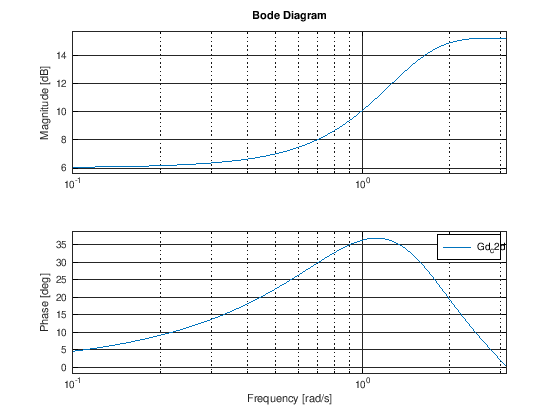

In [34]:
bode(Gd_c2d)

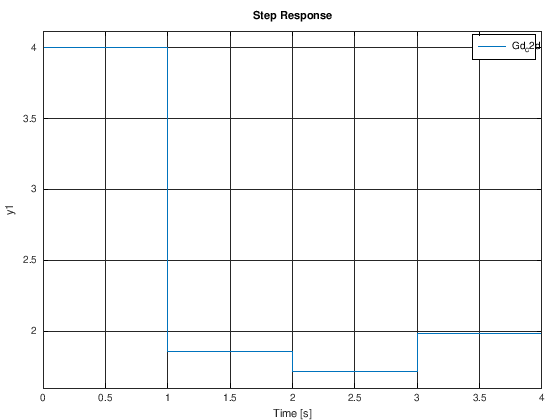

In [35]:
step(Gd_c2d)

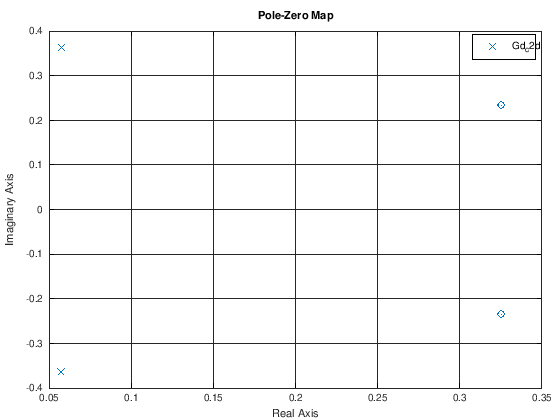

In [36]:
pzmap(Gd_c2d);

## 2 - Réponse harmonique 
---
Tracez la réponse harmonique du filtre continu et superposez-la avec celle de votre filtre numérique. 

Préférez l'utilisation de vecteurs $f$, $p$, $z$ et des outils **plots** (comme dans les exemples du notebook du [TD FILT prepa bilineaire](../FILT_prepa_bilineaire_octave_corr.ipynb) 


Vous devez constater que les fréquences de résonnance ne collent pas !
C'est l'effet de la fameuse compression des fréquences induites par la méthode de la transformation bilinéaire.

Faites un affichage avec en abscisse les fréquences linéaires et en ordonnée le gain en dB.



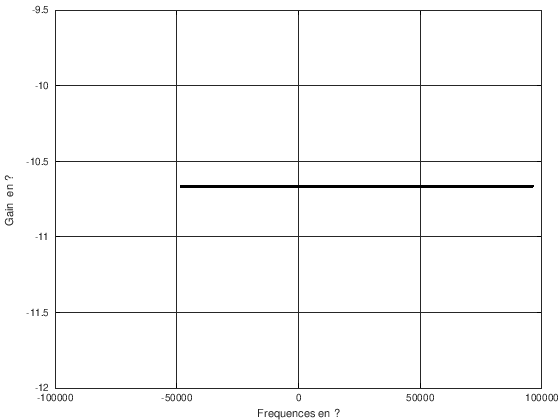

In [41]:
Df = Fe/100;        % résolution fréquentielle d'affichage
f = -Fe: Df: 2*Fe ; % vecteur des fréqeunces [Hz]

%%VOTRE CODE ftilde = , p= , z=
f_tilde = 1;  % fréquences normalisées [1<-> Fe]
p = 1;        % équivalents harmoniques de p
z = 1;        % équivalents harmoniques de z


Gc = @(p,wn,zeta) wn^2./(p.^2 + 2*zeta*wn*p + wn^2)  ;
%%VOTRE CODE G_continu=..., Gd_math=...
% utilisez la fonction anonyme Gd qui prend l'équivalent de z en argument
% pour calculer la fonction de transfert pour chaques fréquences
G_continu = Gc(1,wn,zeta);
Gd_maths = Gd(1);

%%VOTRE affichage ici 
dB_de = @(gains_complexes) 20*log10(gains_complexes);

plot(f,dB_de(G_continu),'k');  
xlabel("Frequences en ?");
ylabel ("Gain  en ? ");grid on;


###  2.1 - Compression fréquencielle 

Dans la transformation $p = \frac{2}{Te}\frac{z-1}{z+1}$ utilisée, remplacez p par $i\omega_c$ d'un côté et z par son expression $e^{T_e\,i\,\omega}$. On obtient un nombre imaginaire des deux côtés, mais avec une pulsation continue $\omega_c$ et une pulsation pour le discret $\omega$ qui sont différentes. 


Vous retrouvez ainsi la relation de compression entre pulsation en coninue $\omega_c$ et pulsation équivalente par la transormation bilinéaire $\omega$ :
$$ \omega_c = \frac{2}{T_e} \tan\left(\frac{T_e}{2}\omega\right)$$

On a donc égalité entre les expressions  
$G_d(z\equiv e^{i\omega\,T_e}) = G(p = \frac{2}{Te}\frac{z-1}{z+1}) = G(p = \frac{2}{Te}\frac{e^{i\omega\,T_e}-1}{e^{i\omega\,T_e}+1}) = G\left(i\, \frac{2}{T_e} \tan\left(\frac{T_e}{2}\omega\right)\right) = G(i\, \omega_c)$  et donc   
$G_d(z\equiv e^{i\omega\,T_e}) = G(p\equiv i\omega_c) = G(\frac{2}{T_e} \tan\left(i\,\frac{T_e}{2}\omega\right))$ 

Ainsi, si le polynome $G(p)$ a une résonnance pour $\omega_c=\omega_n$ en continu, en discret $G\left(\frac{2}{Te}\frac{z-1}{z+1}\right)$ a une résonnace pour $\frac{2}{T_e} tan(\frac{Te}{2}\omega)=w_n$.

Retrouvez donc analytiquement cette fréquence de résonnance en discret et vérifiez que c'est bien cela qui est observé sur la réponse harmonique.

### 2.2 - Compensation fréquencielle 

Pour terminer, effectuez une précompensation de $\omega_n$ :
- on cherche un $\omega_n'$ tel que la résonnance obtenue pour $\omega_c=\omega_n'$ donne une fois compressée par la transformation
- une résonnance en discret $\frac{2}{T_e} tan(\frac{Te}{2}\omega)=w_n'$ lorsque $w = \omega_n$.

> On prend en continu un $\omega_n'$ plus grand qui une fois compressé donnera le $\omega_n$ recherché.



## 3 - Application : filtrage "overtone"
---

Vous êtes enfin prêtes pour synthétiser un filtre dans le [tp2_overtone](./tp2_overtone.ipynb) pour le même effet d'overtone que la chanteuse Ana Maria Hefele.

Explication sur 
[![](https://i.pinimg.com/originals/fa/fe/6d/fafe6d300d6fa568aed43b31fd3bc67d.jpg)](https://www.youtube.com/watch?v=UHTF1-IhuC0)